In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2015.csv', dtype = {'fips': str})
climate_2015 = ur_files.compute()
climate_2015 = climate_2015.loc[:, ~climate_2015.columns.str.contains('^Unnamed')]
climate_2015.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,humidity_temp_index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,75.264706,66.322802,9.384341,4.497802,0.155882,0.156593,0.508242,0.000000,0.0,0.173077,72.034699,66.040713,65.520556,10.8,0.0,3,9.889824
1,01003,12.427907,69.414648,NaN,5.756338,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,68.585925,8.6,1.0,4,16.199579
2,01005,94.311111,67.177808,9.035933,2.735616,0.164795,0.156164,0.443836,0.013699,0.0,0.230137,71.681434,66.964616,64.423201,9.9,0.0,6,10.409531
3,01007,162.637500,64.461918,8.992329,3.349315,0.180301,0.112329,0.427397,0.010959,0.0,0.175342,70.591332,63.925902,63.157399,10.5,0.0,2,9.628611
4,01009,243.931250,60.541644,NaN,4.052877,0.149288,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,63.488756,10.8,1.0,2,12.781537


In [4]:
climate_2015 = climate_2015[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'humidity_temp_index','PM2.5', 'Ozone', 'rurality','SuicideDeathRate']]

In [5]:
climate_2015 = climate_2015.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2015.iloc[:, 1:-1].values
y = climate_2015.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.18967627, 0.0432715 , 0.05173314, 0.06341177, 0.05009968,
       0.04652664, 0.04685277, 0.03591328, 0.00219793, 0.03859947,
       0.0609423 , 0.04241678, 0.16752528, 0.05538691, 0.02165406,
       0.08379223])

In [10]:
len(rf.feature_importances_)

16

In [11]:
columns = climate_2015.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'humidity_temp_index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

16

Text(0.5, 0, 'Random Forest Feature Importance')

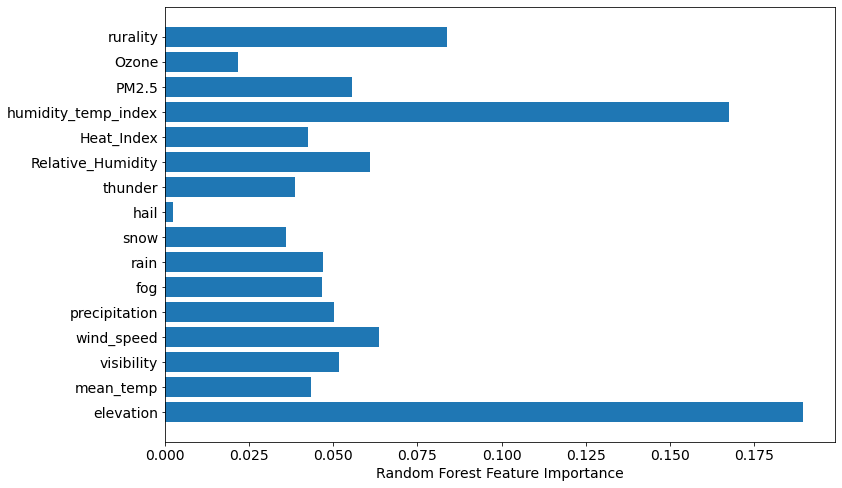

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 14,  7,  9, 11,  1,  5,  6,  4,  2, 13, 10,  3, 15, 12,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00219793, 0.02165406, 0.03591328, 0.03859947, 0.04241678,
       0.0432715 , 0.04652664, 0.04685277, 0.05009968, 0.05173314,
       0.05538691, 0.0609423 , 0.06341177, 0.08379223, 0.16752528,
       0.18967627])

Text(0.5, 0, 'Random Forest Feature Importance')

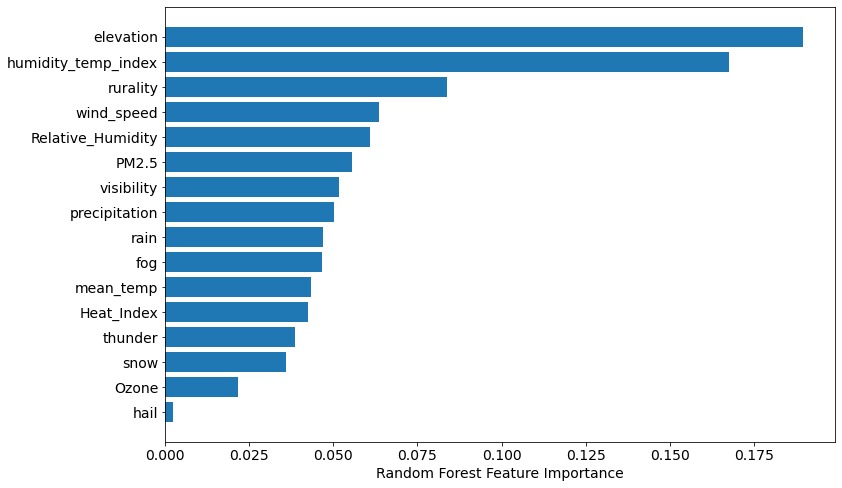

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

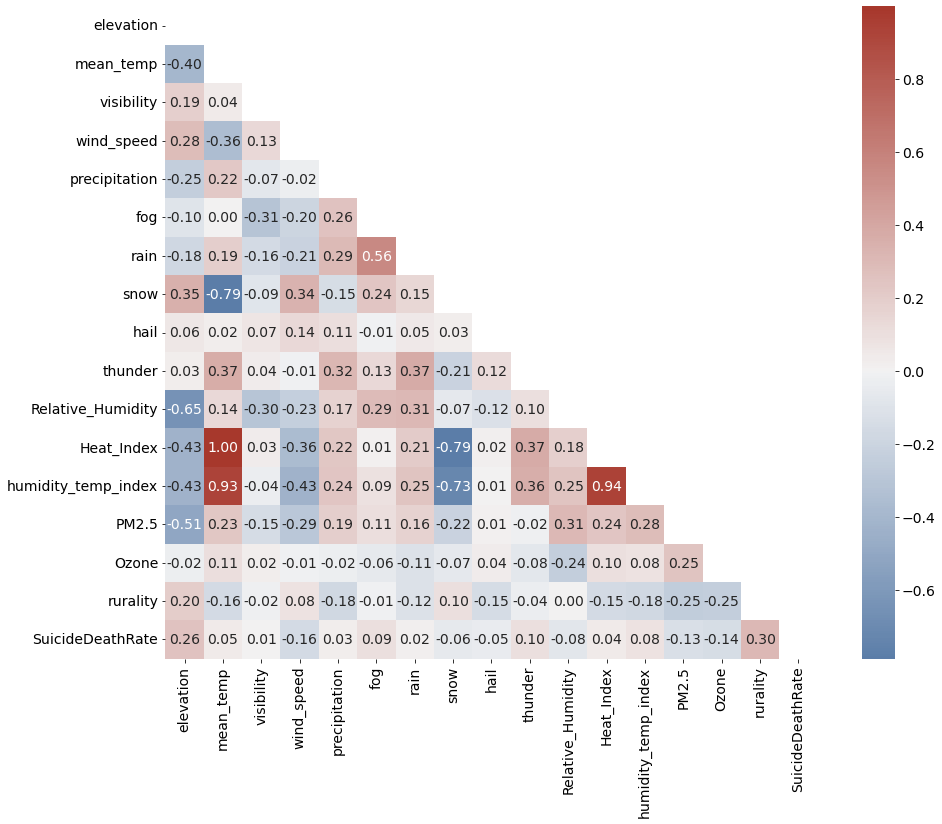

In [21]:
correlation_matrix(climate_2015)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2015.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2015 = ur_files.compute()
social_2015 = social_2015.loc[:, ~social_2015.columns.str.contains('^Unnamed')]
social_2015.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,48075,19861.0,0.202129,0.134623,0.118496,0.065245,0.380798,0.008783,0.089077,0.144496,0.125595,0.201870,0.356566,0.550904,0.175096,0.246253,"Childress County, TX",7.592726
1,48091,32838.0,0.088030,0.102615,0.112378,0.030648,0.201620,0.030443,0.061386,0.169319,0.167108,0.231920,0.306398,0.507119,0.009153,0.189647,"Comal County, TX",9.298866
2,48225,17570.0,0.250114,0.185562,0.226235,0.079667,0.285797,0.021129,0.013428,0.203277,0.074835,0.195172,0.380714,0.535010,0.140965,0.343124,"Houston County, TX",15.901941
3,48349,20697.0,0.207390,0.233678,0.208703,0.084626,0.241346,0.049837,0.028633,0.157135,0.207070,0.262958,0.416040,0.691226,0.017561,0.274059,"Navarro County, TX",20.694079
4,48415,24584.0,0.098580,0.195417,0.081656,0.021605,0.226319,0.045953,0.005885,0.141432,0.269313,0.252872,0.449240,0.595390,0.103434,0.235834,"Scurry County, TX",8.930384


In [23]:
social_2015['SuicideDeathRate'].isna().sum()

122

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2015 = social_2015.dropna(how = 'any')

In [25]:
social_2015.shape

(3098, 18)

In [26]:
X = social_2015.iloc[:, 1:-2].values
y = social_2015.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.04270967, 0.03729607, 0.05106406, 0.24742706, 0.04907785,
       0.04330165, 0.04672237, 0.0393423 , 0.06931567, 0.06966327,
       0.06113913, 0.07013386, 0.08577652, 0.04539552, 0.04163498])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2015.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2015.shape

(3098, 18)

In [32]:
climate_2015.shape

(2750, 18)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

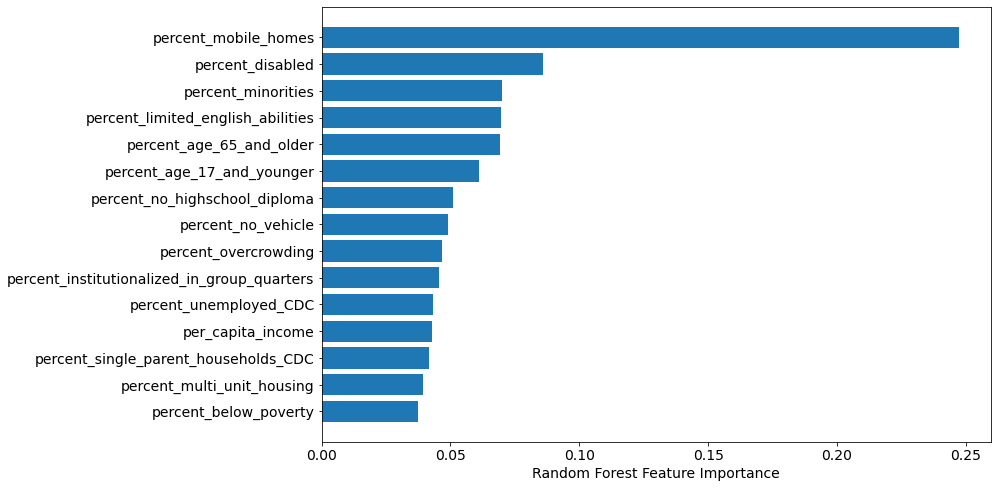

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

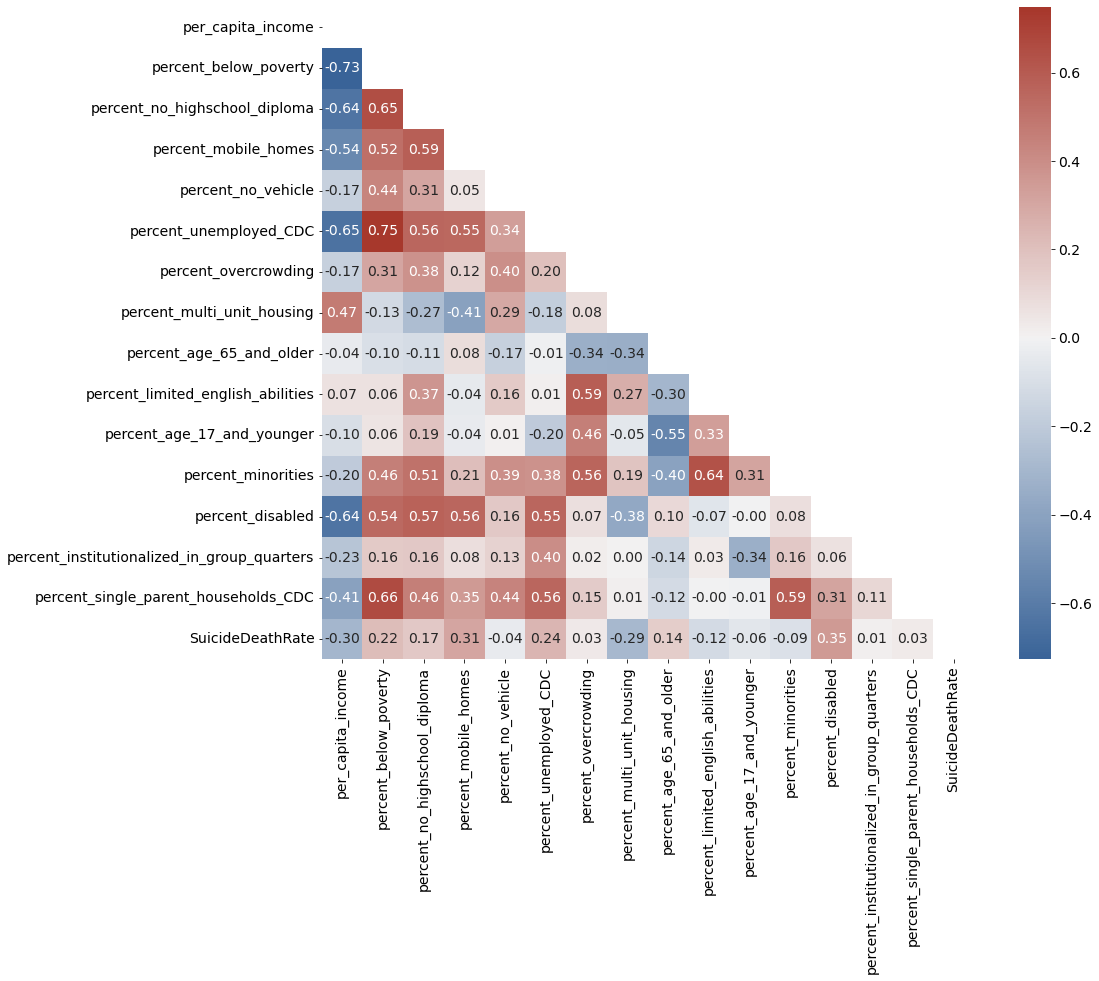

In [36]:
correlation_matrix(social_2015)

## find the rank of importances of all factors

In [37]:
df_total = social_2015.merge(climate_2015, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,humidity_temp_index,PM2.5,Ozone,rurality
0,48075,19861.0,0.202129,0.134623,0.118496,0.065245,0.380798,0.008783,0.089077,0.144496,...,0.269972,0.046832,0.0,0.123967,55.342963,61.367180,60.087092,6.9,0.0,6.0
1,48091,32838.0,0.088030,0.102615,0.112378,0.030648,0.201620,0.030443,0.061386,0.169319,...,0.326027,0.010959,0.0,0.104110,67.037802,69.188968,66.613291,9.2,10.0,2.0
2,48225,17570.0,0.250114,0.185562,0.226235,0.079667,0.285797,0.021129,0.013428,0.203277,...,0.366782,0.003460,0.0,0.069204,72.467798,65.101177,64.217477,9.3,1.0,6.0
3,48349,20697.0,0.207390,0.233678,0.208703,0.084626,0.241346,0.049837,0.028633,0.157135,...,0.353425,0.021918,0.0,0.139726,64.823363,67.186862,64.274269,9.2,1.0,5.0
4,48415,24584.0,0.098580,0.195417,0.081656,0.021605,0.226319,0.045953,0.005885,0.141432,...,0.272727,0.060606,0.0,0.006061,58.234932,63.369708,63.876485,7.1,0.0,5.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index',
       'humidity_temp_index', 'PM2.5', 'Ozone', 'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index','humidity_temp_index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2750, 34)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,humidity_temp_index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,48075,"Childress County, TX",0.202129,19861.0,0.380798,0.134623,0.144496,0.201870,0.550904,0.246253,...,60.087092,0.085399,0.269972,0.046832,0.0,0.123967,6.9,0.0,6.0,7.592726
1,48091,"Comal County, TX",0.088030,32838.0,0.201620,0.102615,0.169319,0.231920,0.507119,0.189647,...,66.613291,0.123288,0.326027,0.010959,0.0,0.104110,9.2,10.0,2.0,9.298866
2,48225,"Houston County, TX",0.250114,17570.0,0.285797,0.185562,0.203277,0.195172,0.535010,0.343124,...,64.217477,0.121107,0.366782,0.003460,0.0,0.069204,9.3,1.0,6.0,15.901941
3,48349,"Navarro County, TX",0.207390,20697.0,0.241346,0.233678,0.157135,0.262958,0.691226,0.274059,...,64.274269,0.063014,0.353425,0.021918,0.0,0.139726,9.2,1.0,5.0,20.694079
4,48415,"Scurry County, TX",0.098580,24584.0,0.226319,0.195417,0.141432,0.252872,0.595390,0.235834,...,63.876485,0.057576,0.272727,0.060606,0.0,0.006061,7.1,0.0,5.0,8.930384


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.01616132, 0.02159037, 0.01920208, 0.01637132, 0.02858297,
       0.02413849, 0.05704085, 0.0147708 , 0.03324254, 0.05118322,
       0.01758781, 0.22248443, 0.01587042, 0.01898637, 0.02011084,
       0.10130749, 0.02300744, 0.02491861, 0.02692269, 0.02210974,
       0.02892608, 0.02433824, 0.04055477, 0.0273643 , 0.02237112,
       0.0184402 , 0.00160034, 0.01914389, 0.02287669, 0.01175395,
       0.0070406 ])

In [47]:
len(rf.feature_importances_)

31

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'humidity_temp_index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

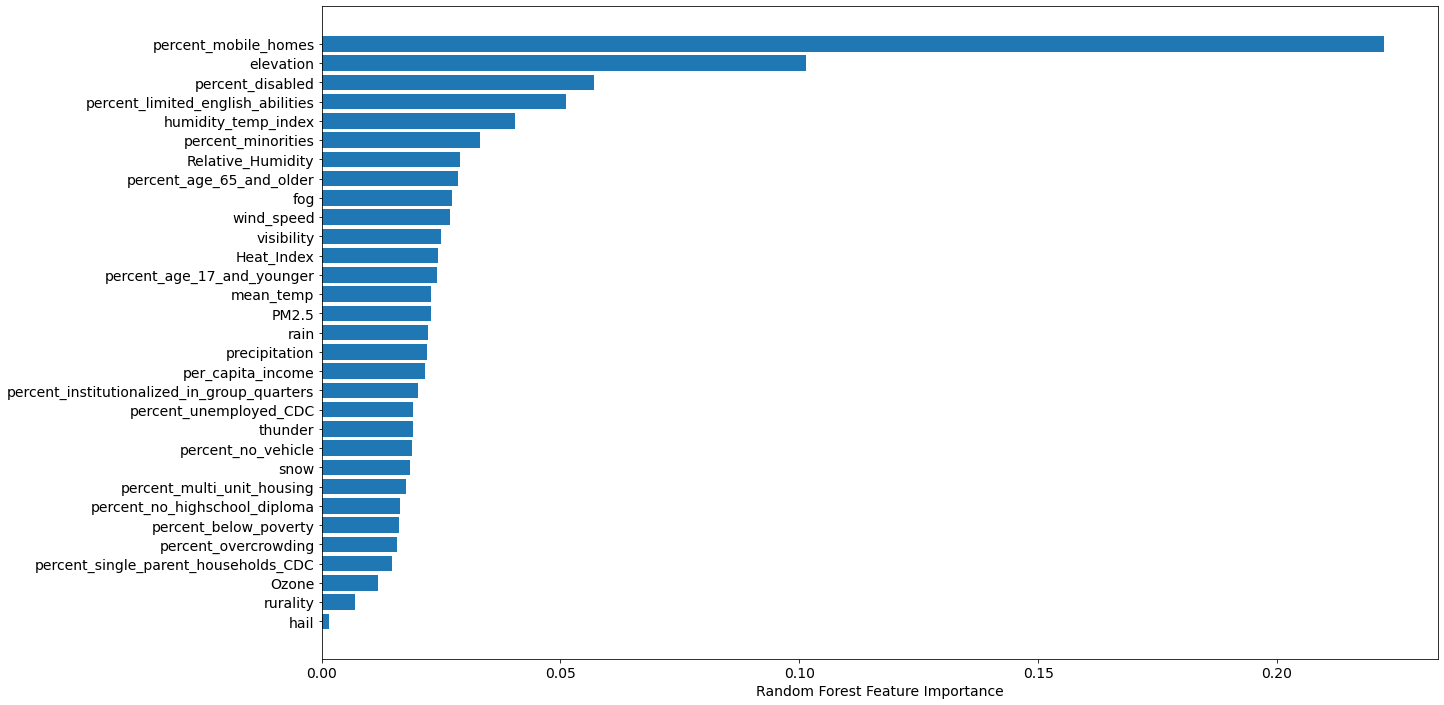

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2015.iloc[:, 1:-1]
y = climate_2015.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


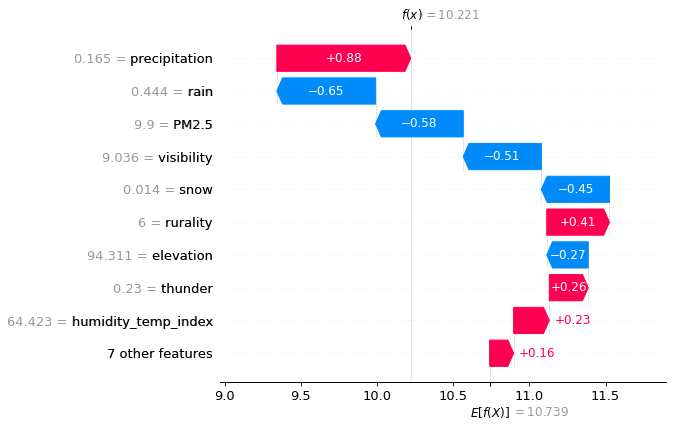

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

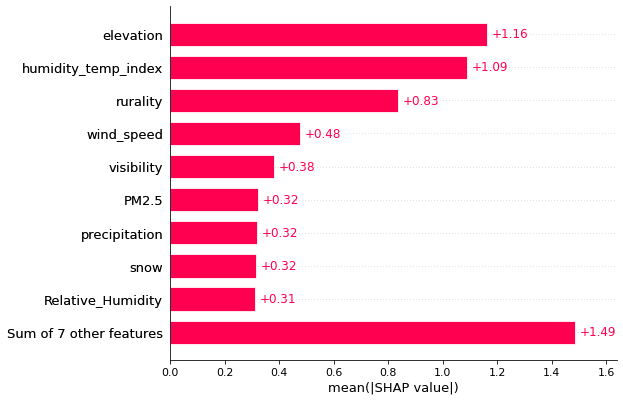

In [56]:
shap.plots.bar(shap_values)

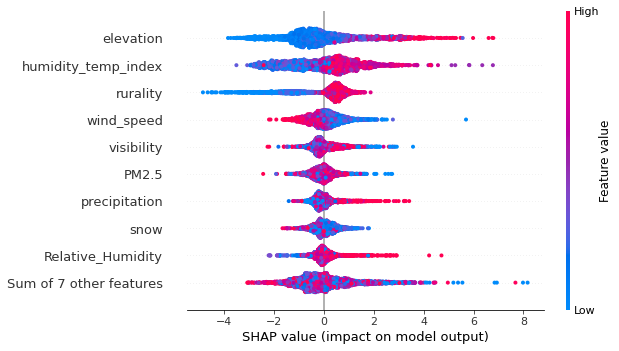

In [57]:
shap.plots.beeswarm(shap_values)

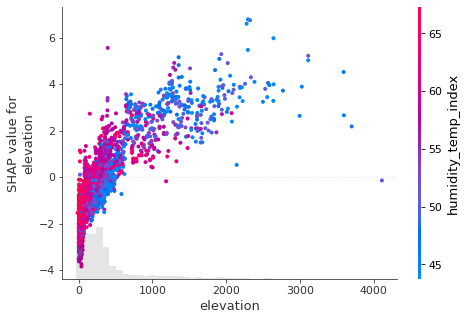

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

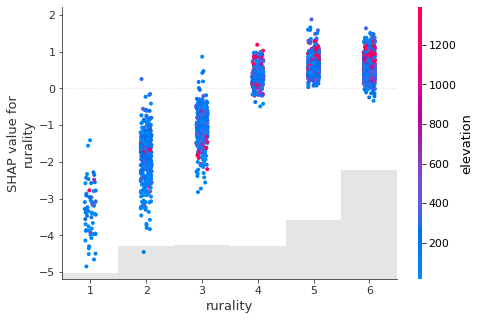

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

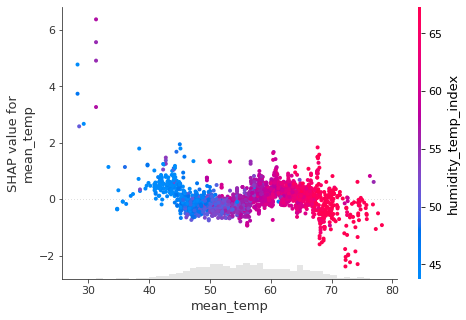

In [60]:
shap.plots.scatter(shap_values[:,"mean_temp"], color=shap_values)

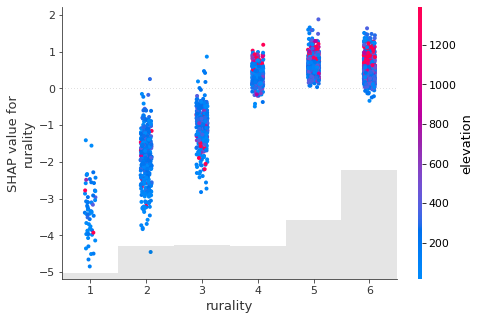

In [61]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

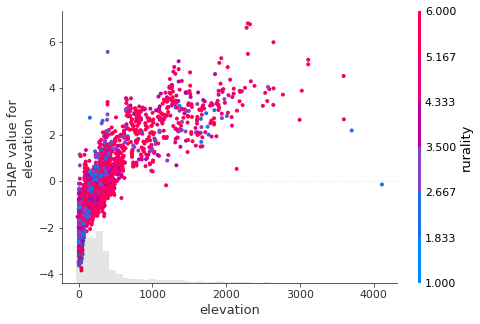

In [62]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

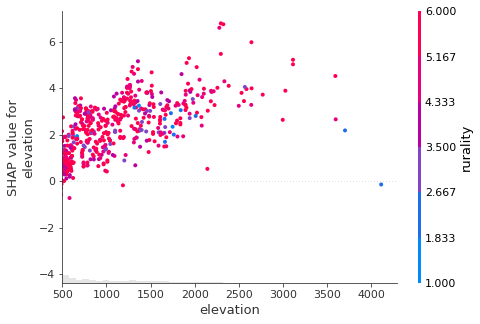

In [63]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

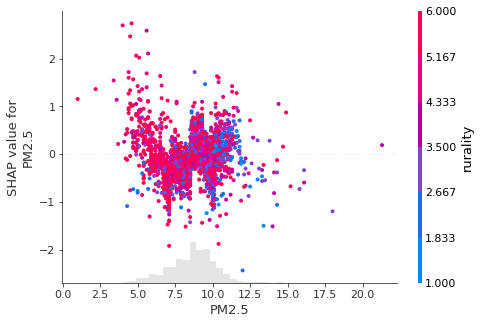

In [64]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

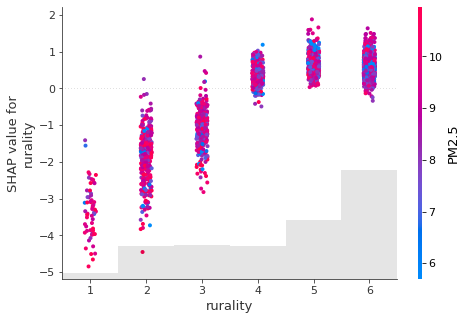

In [65]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

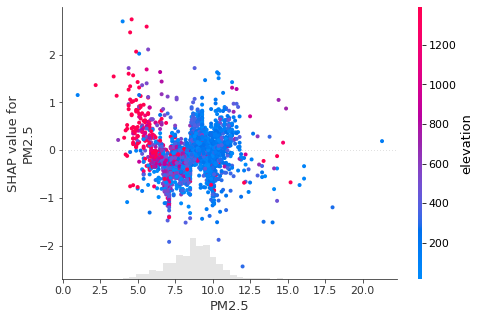

In [66]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

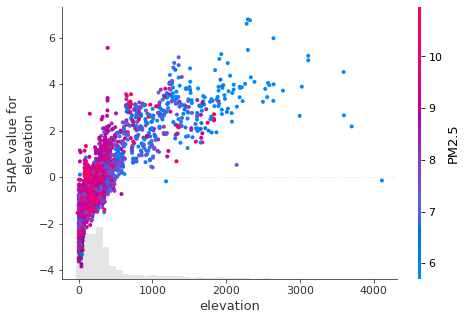

In [67]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

### social economic factors

In [68]:
social_2015.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,48075,19861.0,0.202129,0.134623,0.118496,0.065245,0.380798,0.008783,0.089077,0.144496,0.125595,0.201870,0.356566,0.550904,0.175096,0.246253,"Childress County, TX",7.592726
1,48091,32838.0,0.088030,0.102615,0.112378,0.030648,0.201620,0.030443,0.061386,0.169319,0.167108,0.231920,0.306398,0.507119,0.009153,0.189647,"Comal County, TX",9.298866
2,48225,17570.0,0.250114,0.185562,0.226235,0.079667,0.285797,0.021129,0.013428,0.203277,0.074835,0.195172,0.380714,0.535010,0.140965,0.343124,"Houston County, TX",15.901941
3,48349,20697.0,0.207390,0.233678,0.208703,0.084626,0.241346,0.049837,0.028633,0.157135,0.207070,0.262958,0.416040,0.691226,0.017561,0.274059,"Navarro County, TX",20.694079
4,48415,24584.0,0.098580,0.195417,0.081656,0.021605,0.226319,0.045953,0.005885,0.141432,0.269313,0.252872,0.449240,0.595390,0.103434,0.235834,"Scurry County, TX",8.930384


In [69]:
X = social_2015.iloc[:, 1:-2]
y = social_2015.iloc[:, -1].array

In [70]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


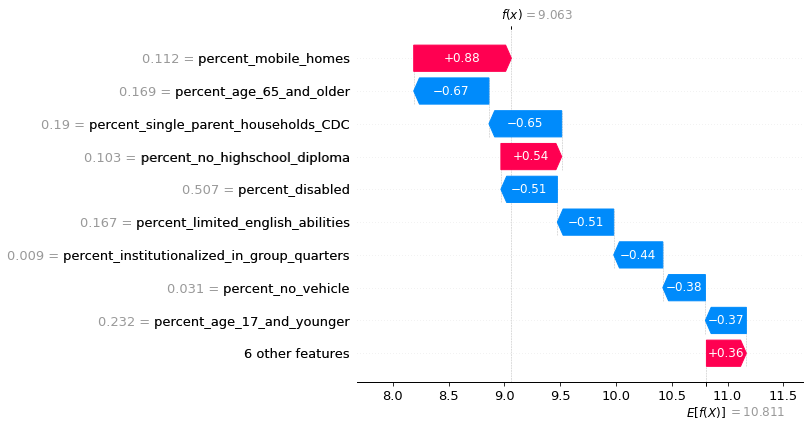

In [71]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

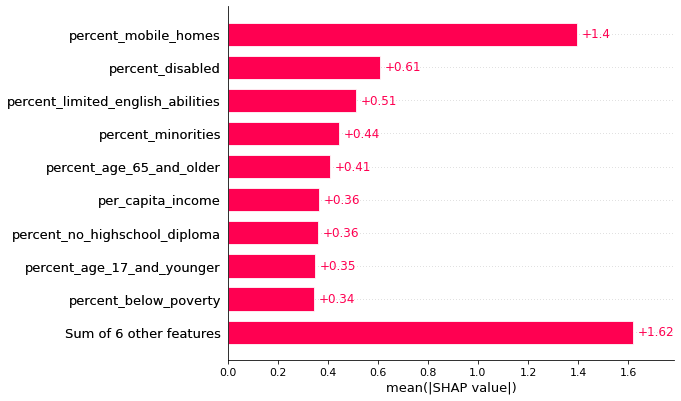

In [72]:
shap.plots.bar(shap_values)

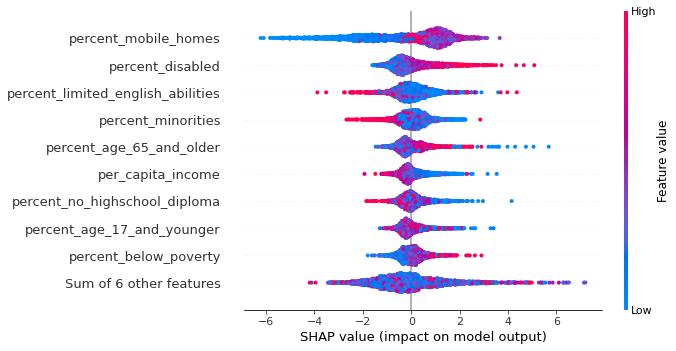

In [73]:
shap.plots.beeswarm(shap_values)

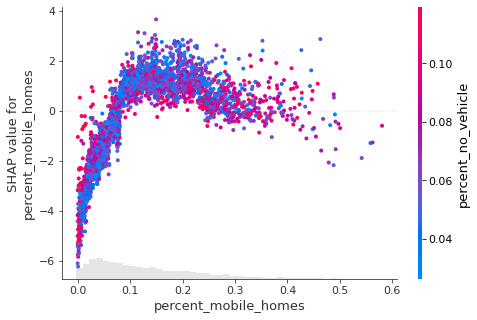

In [74]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)